In [80]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [81]:
bikesharing=pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [82]:
bikesharing.shape

(730, 16)

In [83]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



No null values . Skipping missing value correction step


In [84]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping Casual and registered columns as they are not feature.

Dropping dteday column as well as the yr , mnth and weekday combined gives this column value

Dropping Instant as its just and index column

In [85]:
drop_col_Lst=['dteday','casual','registered', 'instant']
Bikedata=bikesharing.drop(drop_col_Lst, axis=1)

In [86]:
Bikedata.shape

(730, 12)

# EDA

In [87]:
# Target variable 
#Cnt

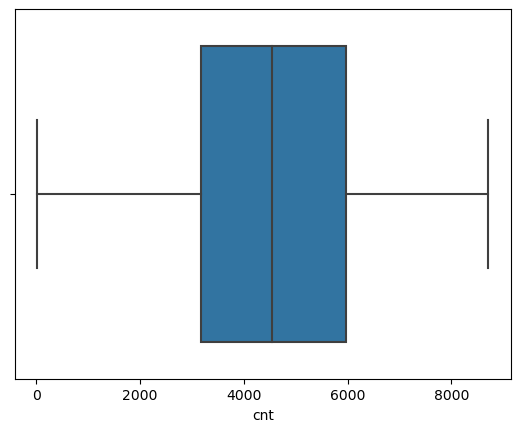

In [88]:
sns.boxplot(Bikedata['cnt'])
plt.show()

In [89]:
Bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# mapping varaibles to the categorical values given in data dictonary

In [90]:
#mapping the season column

Bikedata.season = Bikedata.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [91]:
#mapping the month column

Bikedata.mnth = Bikedata.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [92]:
#mapping the weekday column

Bikedata.weekday = Bikedata.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [93]:
#mapping the weathersit column

Bikedata.weathersit = Bikedata.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [94]:
Bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


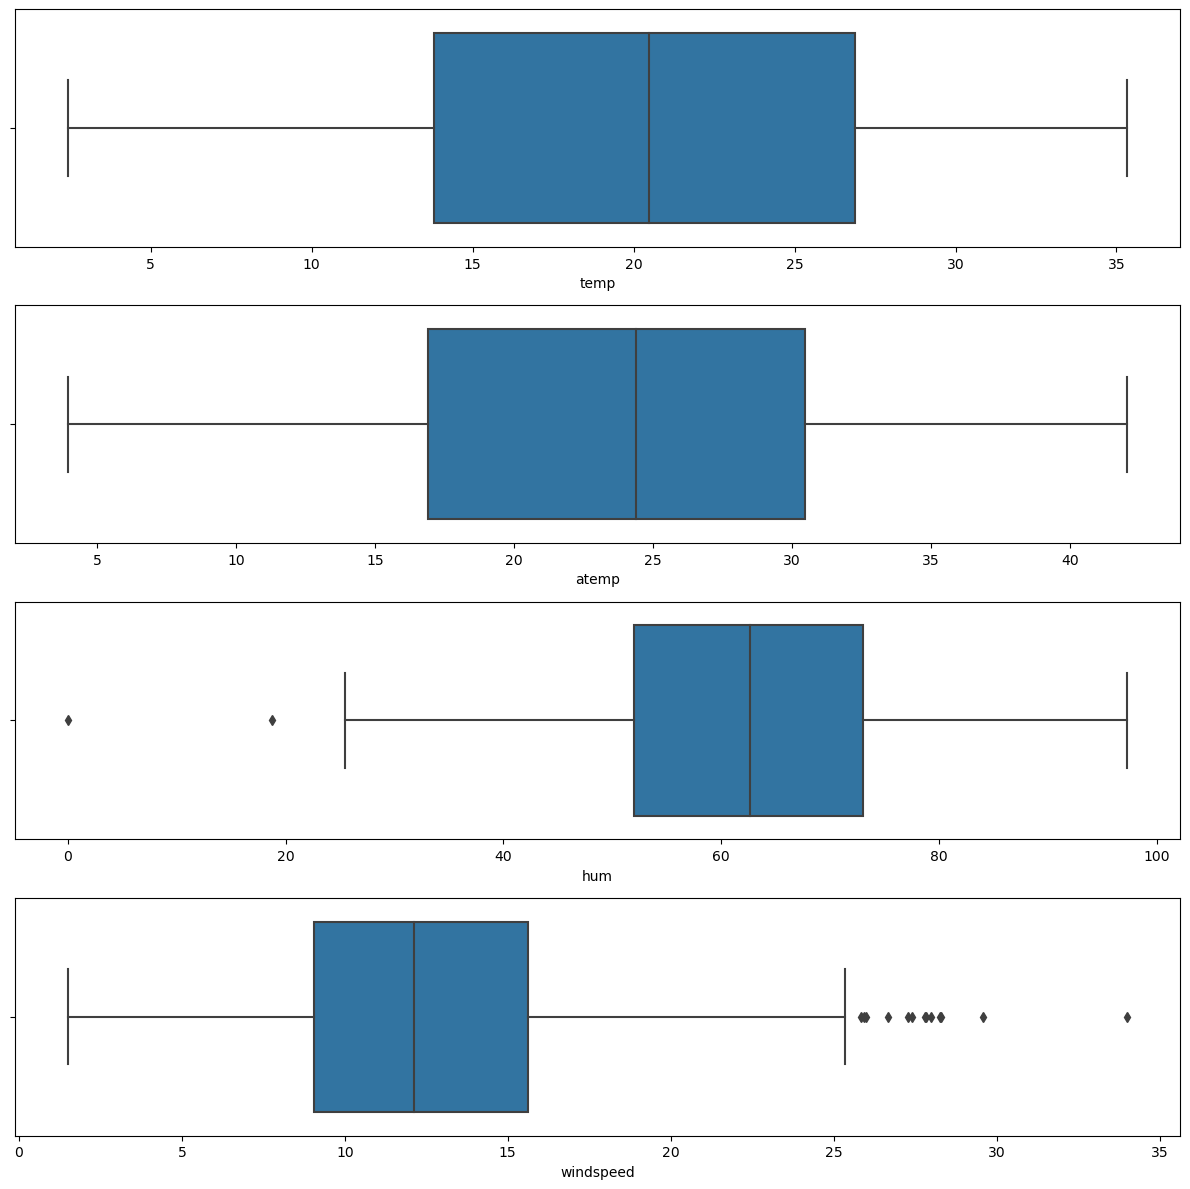

In [95]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (12,12))
plt1 = sns.boxplot(Bikedata['temp'], ax = axs[0])
plt2 = sns.boxplot(Bikedata['atemp'], ax = axs[1])
plt3 = sns.boxplot(Bikedata['hum'], ax = axs[2])
plt4 = sns.boxplot(Bikedata['windspeed'], ax = axs[3])
plt.tight_layout()

 Few outliers in Windspeed, and humidity could be the seasonal

# Univariate analysis


In [96]:
Bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


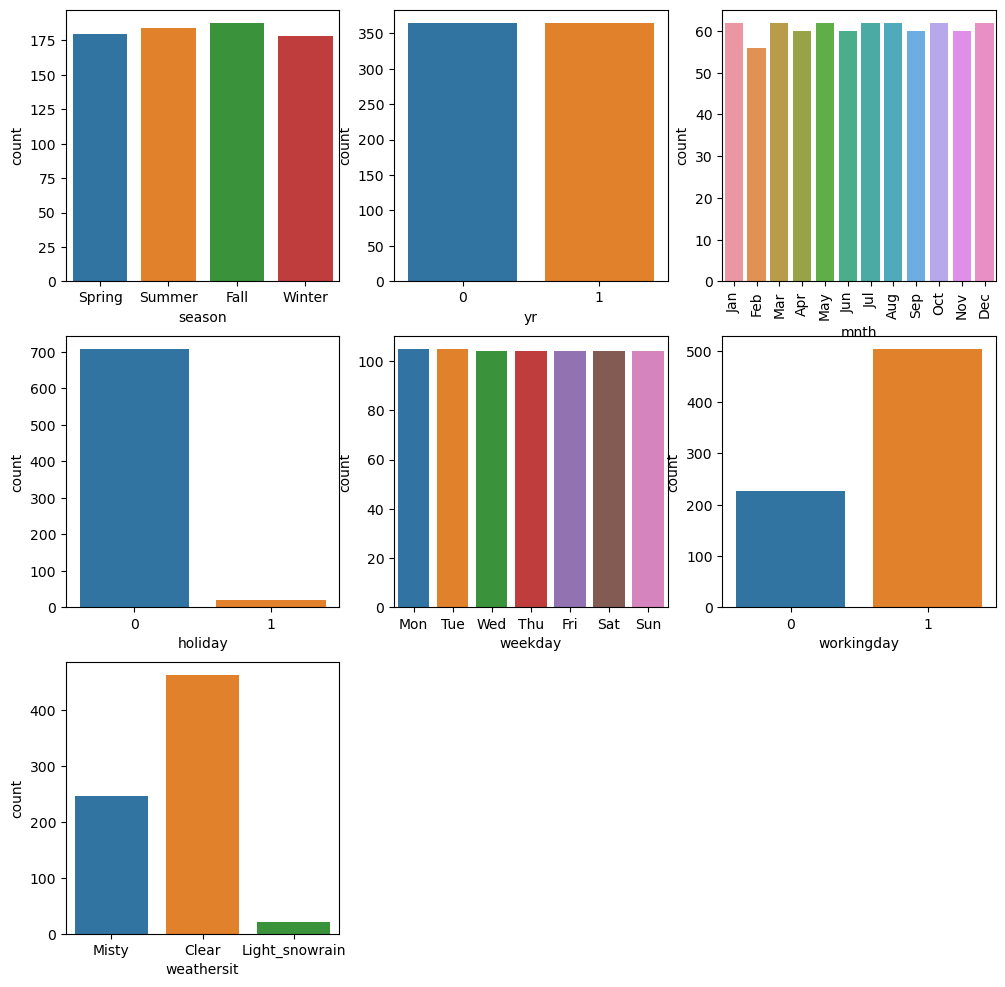

In [97]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'season', data = Bikedata)
plt.subplot(3,3,2)
sns.countplot(x = 'yr', data = Bikedata)
plt.subplot(3,3,3)
sns.countplot(x = 'mnth',  data = Bikedata )
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.countplot(x = 'holiday', data = Bikedata)
plt.subplot(3,3,5)
sns.countplot(x = 'weekday', data = Bikedata)
plt.subplot(3,3,6)
sns.countplot(x = 'workingday', data = Bikedata)
plt.subplot(3,3,7)
sns.countplot(x = 'weathersit', data = Bikedata)

plt.show()

In [98]:
Bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Bivariate analysis
# Plotting variables against target variable

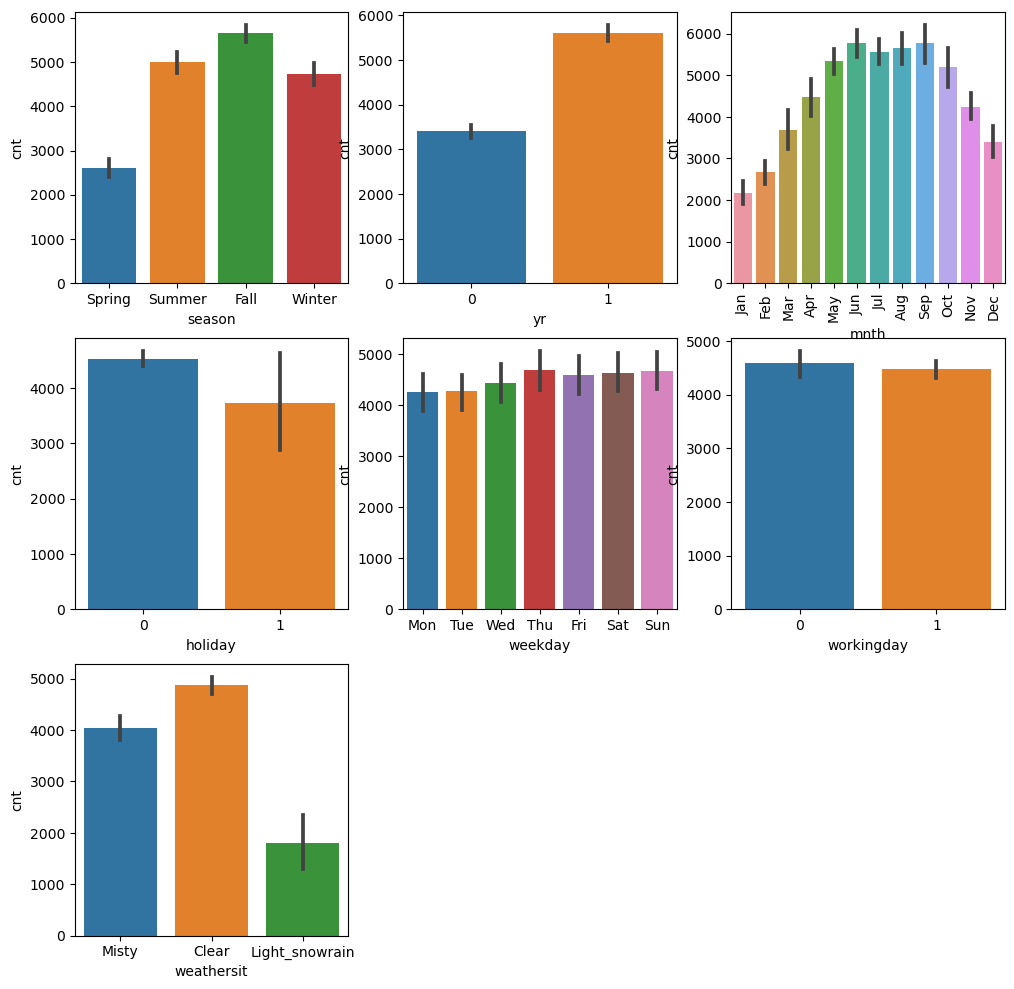

In [99]:
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season',y='cnt', data = Bikedata)
plt.subplot(3,3,2)
sns.barplot(x = 'yr' ,y='cnt', data = Bikedata)
plt.subplot(3,3,3)
sns.barplot(x = 'mnth',y='cnt',  data = Bikedata )
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday',y='cnt', data = Bikedata)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday',y='cnt', data = Bikedata)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday',y='cnt', data = Bikedata)
plt.subplot(3,3,7)
sns.barplot(x = 'weathersit',y='cnt', data = Bikedata)

plt.show()

Except spring all other season show similar cnt.

2019 clearly rental bike seen boom in uasage.

weekday, holiday and working day are  not showing any such differentpattern in bike renting.

Clear wheather preffered amoung to the users to rent bike.

# Pairplot

In [100]:
Bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


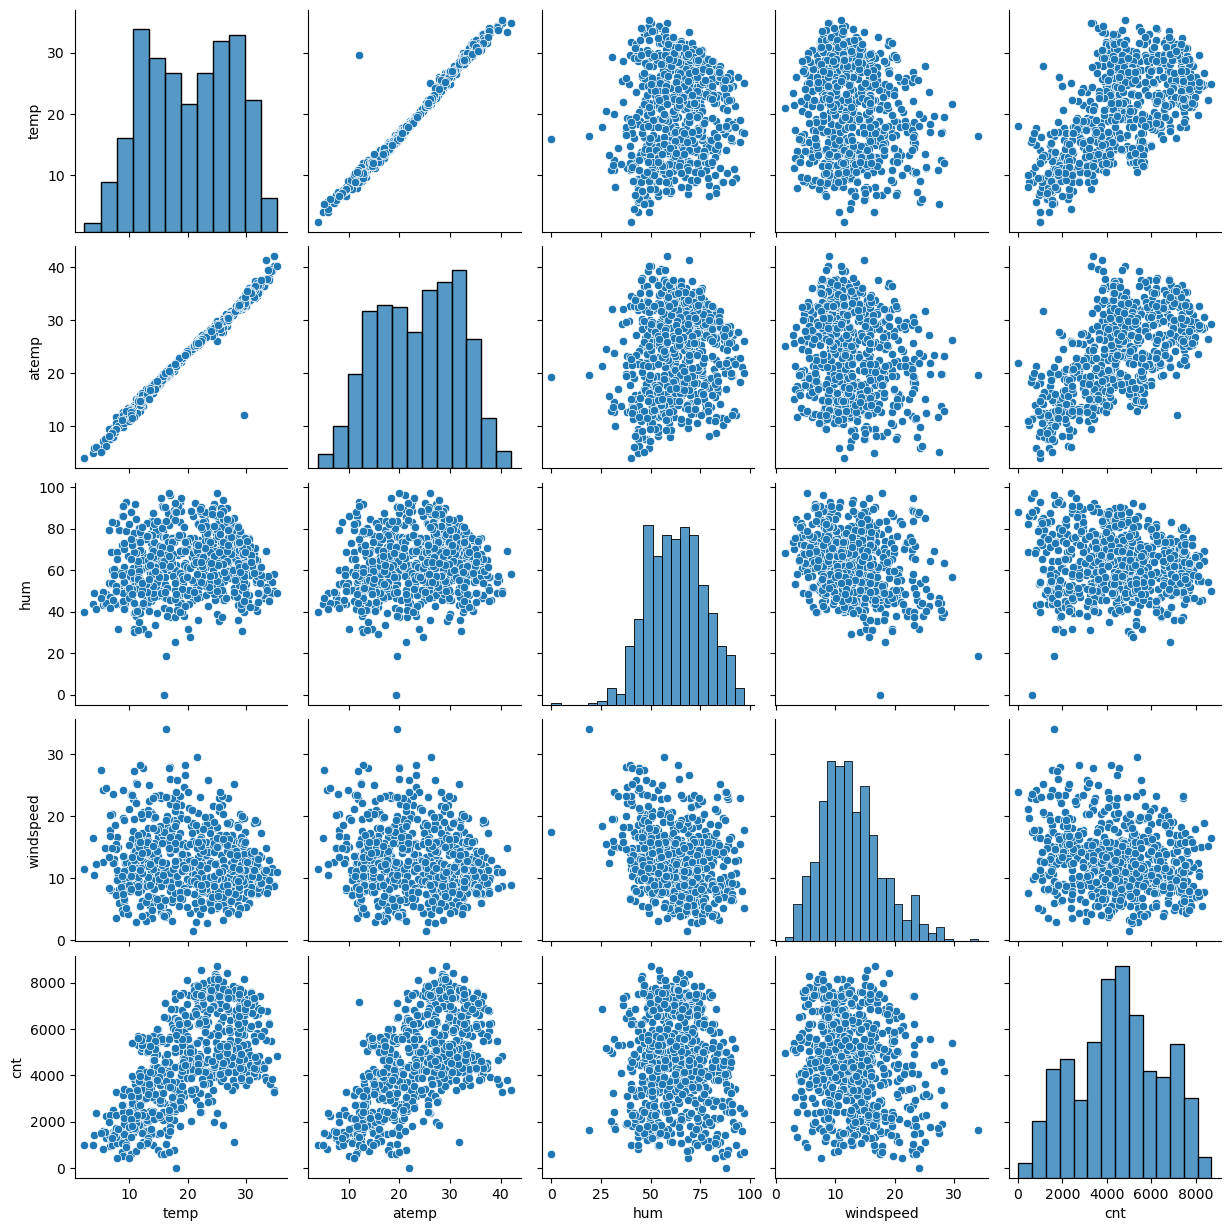

In [101]:
sns.pairplot(data=Bikedata,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Temp and atemp show some pattern

# Multivariate analysis

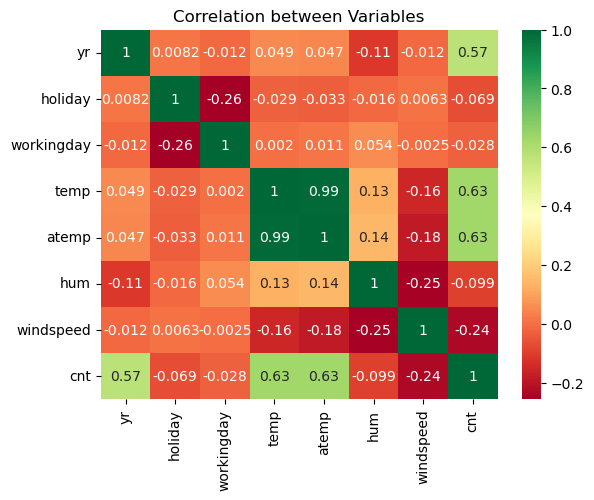

In [102]:
sns.heatmap(Bikedata.corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Variables")
plt.show()

Temp , atemp shows same correlational coefficient and higher correlation.

year also showing high correlation coefficient



# Data Preparation for model building

Creating dummy variables

In [103]:
seasons_new=pd.get_dummies(Bikedata.season,drop_first=True)
mnths_new=pd.get_dummies(Bikedata.mnth,drop_first=True)
weekday_new=pd.get_dummies(Bikedata.weekday,drop_first=True)
weathersit_new=pd.get_dummies(Bikedata.weathersit,drop_first=True)

In [104]:
#add created dummy variables in main dataset

Bike= pd.concat([Bikedata,seasons_new,mnths_new,weekday_new,weathersit_new],axis=1)

In [105]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# drop season  , mnth,weekday and weathersit varaiable as we have dummy variables

Bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [107]:
Bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting data to Training and Test set

In [108]:
Bike_train, Bike_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
Bike_train.shape

(510, 30)

In [110]:
Bike_test.shape

(219, 30)

# Rescaling Features

In [111]:
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [112]:
scaler = MinMaxScaler()

In [113]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

Bike_train[scale_vars] = scaler.fit_transform(Bike_train[scale_vars])
#Train dataset after scaling
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


# Dividing traing dataset into X and Y

In [114]:
y_train = Bike_train.pop('cnt')
X_train = Bike_train

# Build a Model

# RFE

In [115]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 20

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [116]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 8),
 ('Tue', False, 3),
 ('Wed', False, 6),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [117]:
#columns selected for model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep',
       'Sat', 'Sun', 'Light_snowrain', 'Misty'],
      dtype='object')

# Build Model

In [118]:
# Creating X_test from RFE selected columns
X_train_rfe = X_train[col]

In [119]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [120]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [121]:
# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.51e-185
Time:                        08:42:06   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3804      0.081      4.

In [122]:
# atemp is insignificant compare to ther variables droping it
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)

In [123]:
#Linear model rebuilding model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.11e-186
Time:                        08:42:06   Log-Likelihood:                 518.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     490   BIC:                            -912.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3801      0.081      4.

# R Squared and Adjusted R Squared  remails same

In [124]:
# sun is insignificant compare to ther variables droping it
X_train_rfe = X_train_rfe.drop(["Sun"], axis = 1)

#rebuilding model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.88e-187
Time:                        08:42:07   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3474      0.038      9.

# R Squared and Adjusted R Squared remails same

In [125]:
# sat is insignificant compare to ther variables droping it
X_train_rfe = X_train_rfe.drop(["Sat"], axis = 1)

#rebuilding model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.60e-188
Time:                        08:42:07   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3443      0.037      9.

# R Squared and Adjusted R Squared remails same

In [126]:
# feb is insignificant compare to ther variables droping it
X_train_rfe = X_train_rfe.drop(["Feb"], axis = 1)

#rebuilding model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          4.55e-189
Time:                        08:42:07   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3329      0.036      9.

# R Squared and Adjusted R Squared remails same

In [127]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.69
7,Spring,5.27
4,temp,4.43
9,Winter,3.83
8,Summer,2.76
5,hum,1.94
13,Nov,1.76
11,Jan,1.68
16,Misty,1.59
10,Dec,1.50


Spring shows VIF greater than 5

In [128]:
# 6th linear regression model

# Adding a constant variable 
 
X_train_rfe= sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          4.55e-189
Time:                        08:42:10   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3329      0.036      9.

In [129]:
# Since spring has VIF>5 dropping it
X_train_rfe = X_train_rfe.drop(['Spring'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.74
4,temp,2.33
8,Winter,2.08
5,hum,1.91
12,Nov,1.70
10,Jan,1.67
15,Misty,1.58
9,Dec,1.48
7,Summer,1.44
11,Jul,1.43


All VIF are under 5

In [130]:
# 7th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.42e-188
Time:                        08:42:11   Log-Likelihood:                 512.67
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     494   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2681      0.029      9.

In [131]:
#droping workingday columns as it has high pval

X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
7,Winter,2.08
4,hum,1.90
11,Nov,1.70
9,Jan,1.67
14,Misty,1.55
8,Dec,1.47
6,Summer,1.44
10,Jul,1.43


In [132]:
# 8th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.54e-188
Time:                        08:42:13   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2563      0.029      8.

In [133]:
#droping nov columns as it has high pval

X_train_rfe = X_train_rfe.drop(['Nov'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
3,temp,2.25
4,hum,1.90
9,Jan,1.63
7,Winter,1.55
13,Misty,1.55
6,Summer,1.43
10,Jul,1.43
8,Dec,1.26
12,Light_snowrain,1.25


In [134]:
# 9th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          4.25e-189
Time:                        08:42:14   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2498      0.029      8.

In [135]:
#droping dec columns as it has high pval

X_train_rfe = X_train_rfe.drop(['Dec'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
8,Jan,1.55
12,Misty,1.55
7,Winter,1.53
9,Jul,1.43
6,Summer,1.41
11,Light_snowrain,1.24
5,windspeed,1.19


In [136]:
# 10th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          6.03e-190
Time:                        08:42:15   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2444      0.028      8.

In [137]:
#droping jan columns as it has high pval

X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
11,Misty,1.55
8,Jul,1.43
6,Summer,1.33
7,Winter,1.29
10,Light_snowrain,1.24
9,Sep,1.19
5,windspeed,1.18


In [138]:
# 11th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          3.89e-190
Time:                        08:42:16   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2257      0.027      8.

In [139]:
#droping july columns as it has high pval

X_train_rfe = X_train_rfe.drop(['Jul'], axis = 1)

# Recalculate VIF for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.86
10,Misty,1.55
3,temp,1.27
7,Winter,1.25
9,Light_snowrain,1.23
6,Summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


In [140]:
# 12th linear regression model

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# linear modelsummary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          7.80e-190
Time:                        08:42:17   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2256      0.027      8.

R squared and adjusted r squared are almost close.

F-statistic= 257.6 and P value is 7.80e-190 which is almost equal to 0.

Model 7 looks significant overall

# Residual Analysis of the train data

In [141]:
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,Summer,Winter,Sep,Light_snowrain,Misty
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,1,0,0,0,1
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,1


In [142]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

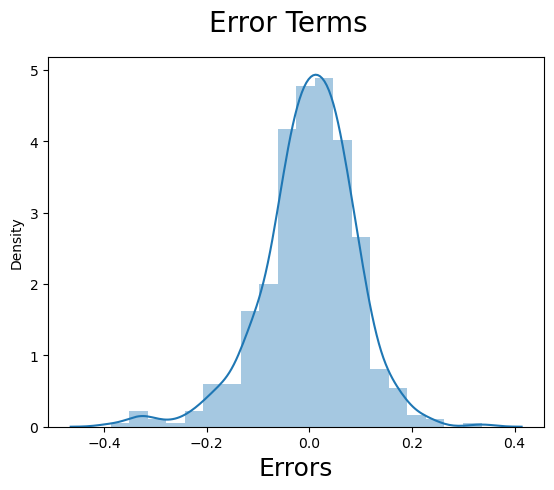

In [143]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

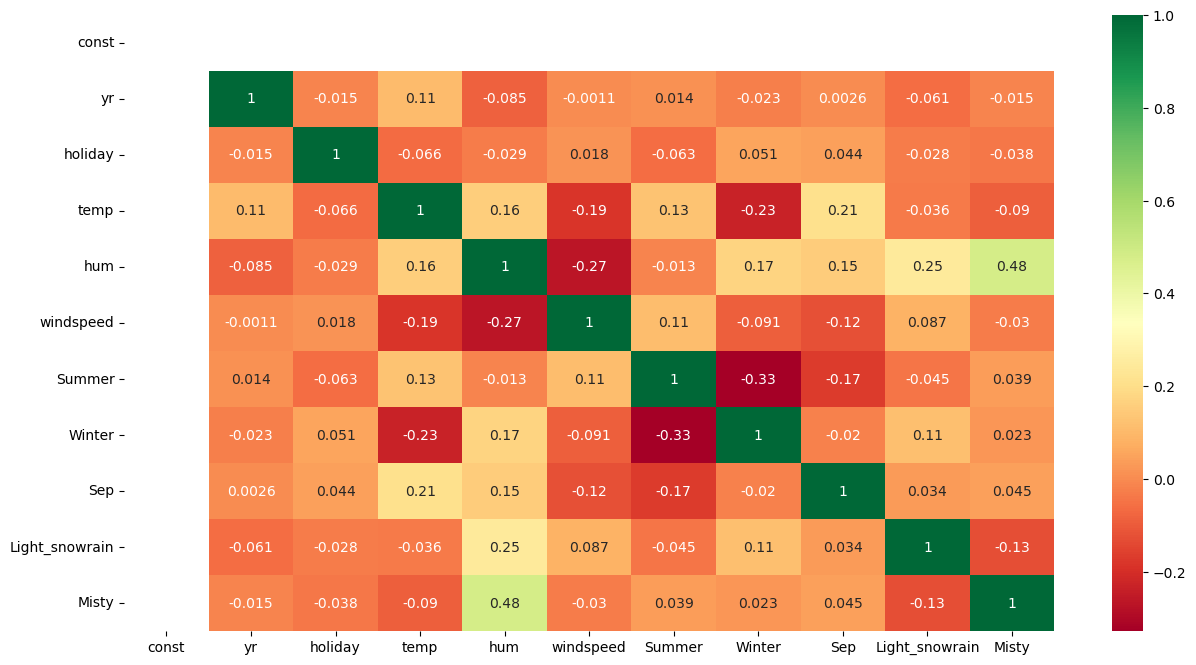

In [144]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [145]:
lm.params

const             0.225646
yr                0.228914
holiday          -0.097964
temp              0.570606
hum              -0.173973
windspeed        -0.186706
Summer            0.089525
Winter            0.140200
Sep               0.106731
Light_snowrain   -0.236675
Misty            -0.051831
dtype: float64

Dont show any multicoleanrity

# Making Predictions

## Scaling test data

In [146]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

Bike_test[scale_vars] = scaler.fit_transform(Bike_test[scale_vars])
#Train dataset after scaling
Bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


### Dividing in x and y test

In [147]:
y_test = Bike_test.pop('cnt')
X_test = Bike_test

In [148]:
# Now let's use our model to make predictions.
columns_list=X_train_rfe.columns
columns_list=columns_list.drop('const')

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[columns_list]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [149]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [150]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.804

# Model evalution

Text(0, 0.5, 'y_pred')

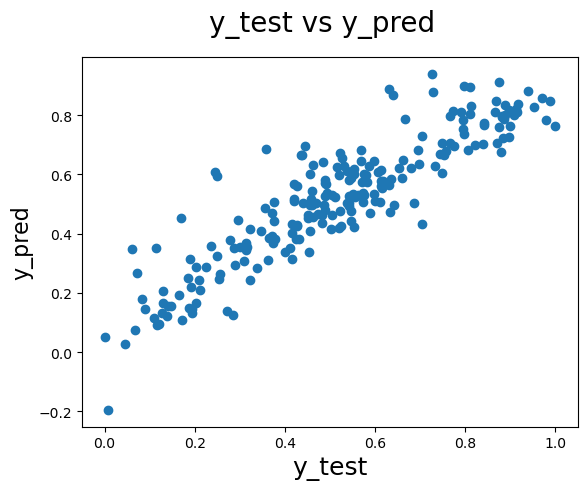

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [152]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.804

In [153]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7739


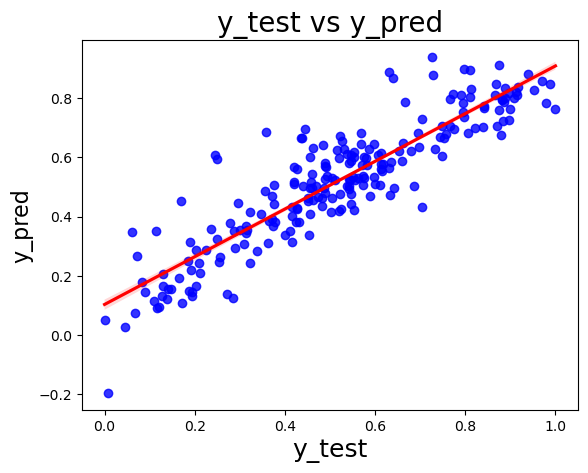

In [154]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Training Vs Test data Summary

Training R squared:0.838 

Training adjusted R squared:0.834

Testing R square: 0.804

Testing adjusted R squared: 0.7739
